In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
for col in df:
    print(f'colunm:{col}\n{df[col].value_counts()}\n')

colunm:ID
100000001    1
100001330    1
100001343    1
100001342    1
100001341    1
            ..
100000662    1
100000661    1
100000660    1
100000659    1
100002000    1
Name: ID, Length: 2000, dtype: int64

colunm:Sex
0    1086
1     914
Name: Sex, dtype: int64

colunm:Marital status
0    1007
1     993
Name: Marital status, dtype: int64

colunm:Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
65     12
58     12
55     10
67     10
56     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
70      3
73      3
18      3
75      2
72      1
76      1
Name: Age, dtype: int64

colunm:Education
1    1386
2     291


In [5]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [6]:
cat_col = ['Occupation','Education','Settlement size']
cols = [x for x in df.columns if x not in ['ID']]

df_r = pd.get_dummies(data=df[cols],columns=cat_col,drop_first=True)
df_r

,Sex,Marital status,Age,Income,Occupation_1,Occupation_2,Education_1,Education_2,Education_3,Settlement size_1,Settlement size_2
0,0,0,67,124670,1,0,0,1,0,0,1
1,1,1,22,150773,1,0,1,0,0,0,1
2,0,0,49,89210,0,0,1,0,0,0,0
3,0,0,45,171565,1,0,1,0,0,1,0
4,0,0,53,149031,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,123525,0,0,1,0,0,0,0
1996,1,1,27,117744,1,0,1,0,0,0,0
1997,0,0,31,86400,0,0,0,0,0,0,0
1998,1,1,24,97968,0,0,1,0,0,0,0


In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(df_r)


In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [10]:
pca.fit(df_mms)

PCA(n_components=2)

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.25879954, 0.44716394])

In [12]:
Xp = pd.DataFrame(pca.transform(df_mms),columns=['p1','p2'])
Xp

,p1,p2
0,1.032069,0.151878
1,-0.661400,-0.158277
2,0.505802,0.171555
3,0.431306,-0.950440
4,0.440922,-0.939106
...,...,...
1995,-0.138560,0.391044
1996,-0.888567,-0.228958
1997,0.756890,0.467313
1998,-0.818491,0.492018


In [13]:
import seaborn as sns

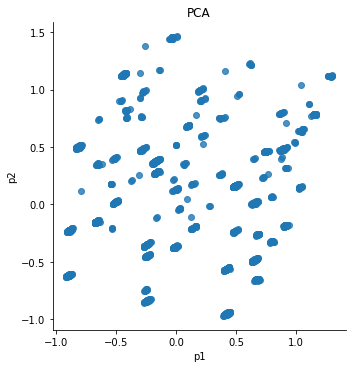

In [14]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False).set(title="PCA")

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(df_mms)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

In [16]:
df_tsne

,x,y
0,55.926174,54.198200
1,-57.430622,44.516571
2,42.770481,-57.295624
3,-88.608940,-3.040108
4,-89.351913,-9.449634
...,...,...
1995,-44.461697,31.816893
1996,29.579767,10.532527
1997,2.008067,44.866917
1998,-25.075827,10.349294


<AxesSubplot:xlabel='x', ylabel='y'>

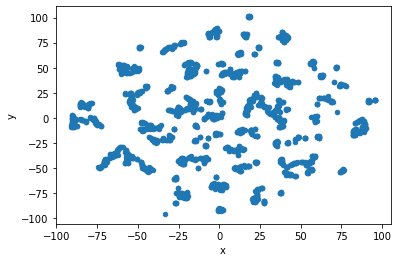

In [17]:
df_tsne.plot.scatter('x','y')

In [18]:
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

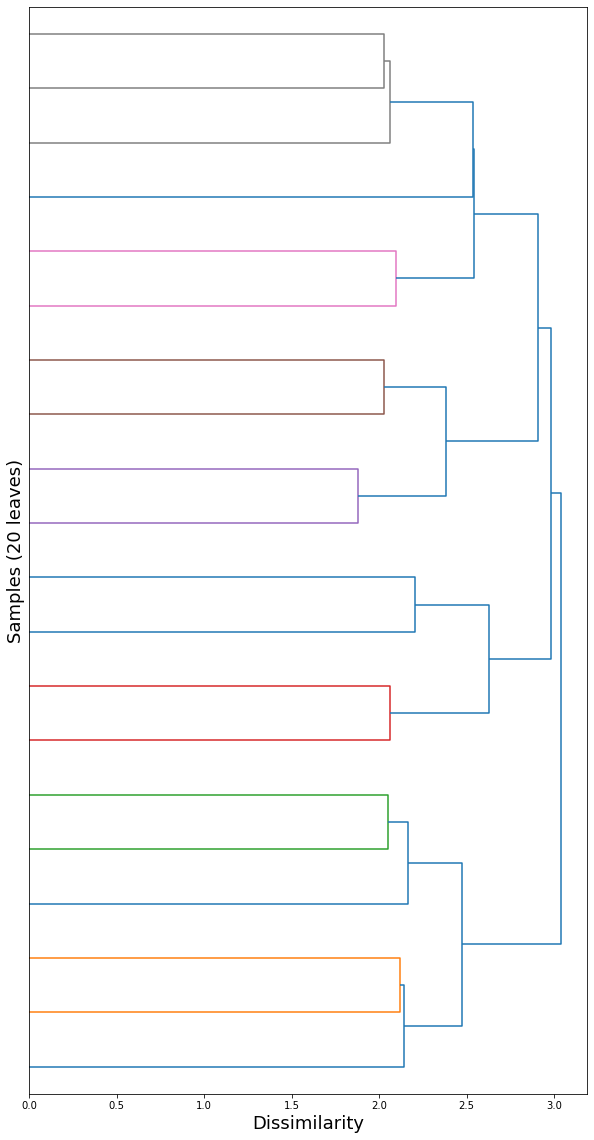

In [19]:
#complete
dm = pdist(df_mms, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(10, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (20 leaves)', fontsize=18)

plt.show()

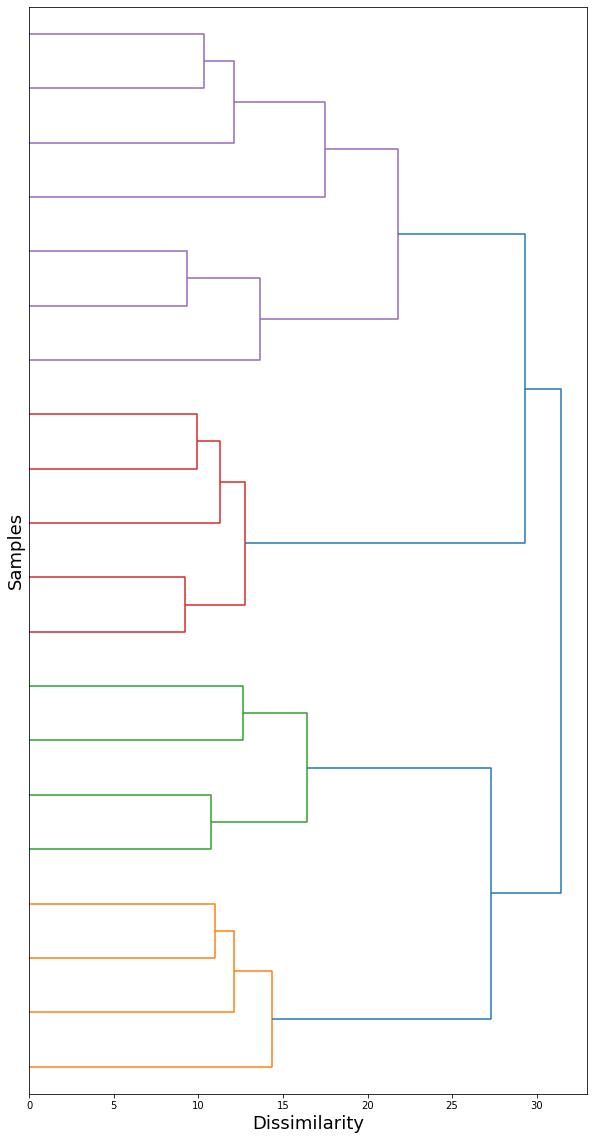

In [20]:
#ward
dm = pdist(df_mms, metric='euclidean')
Z = linkage(dm, method='ward')

fig, ax = plt.subplots(figsize=(10, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

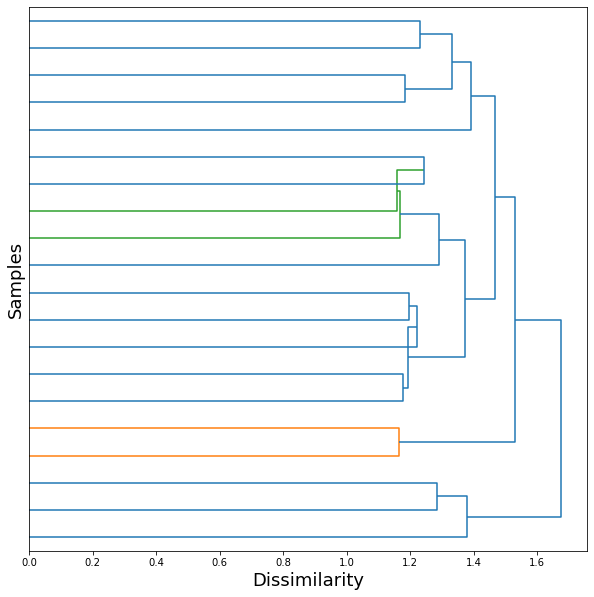

In [28]:
#Centroid
dm = pdist(df_mms, metric='euclidean')
Z = linkage(dm, method='centroid')

fig, ax = plt.subplots(figsize=(10, 10))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

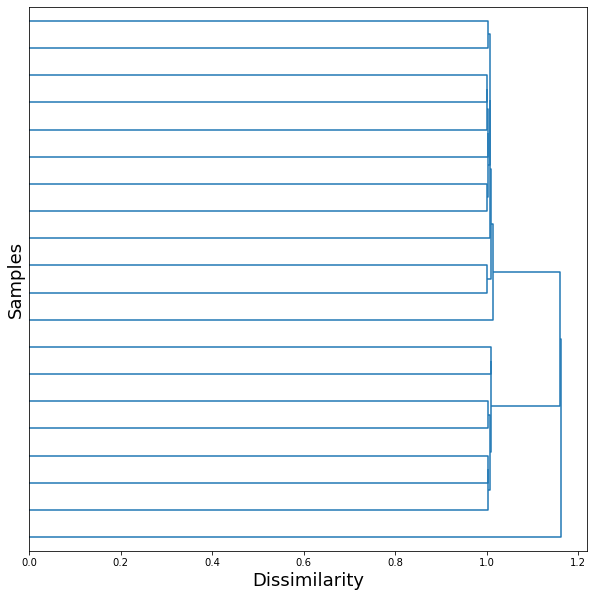

In [32]:
dm = pdist(df_mms, metric='euclidean')
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(10, 10))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

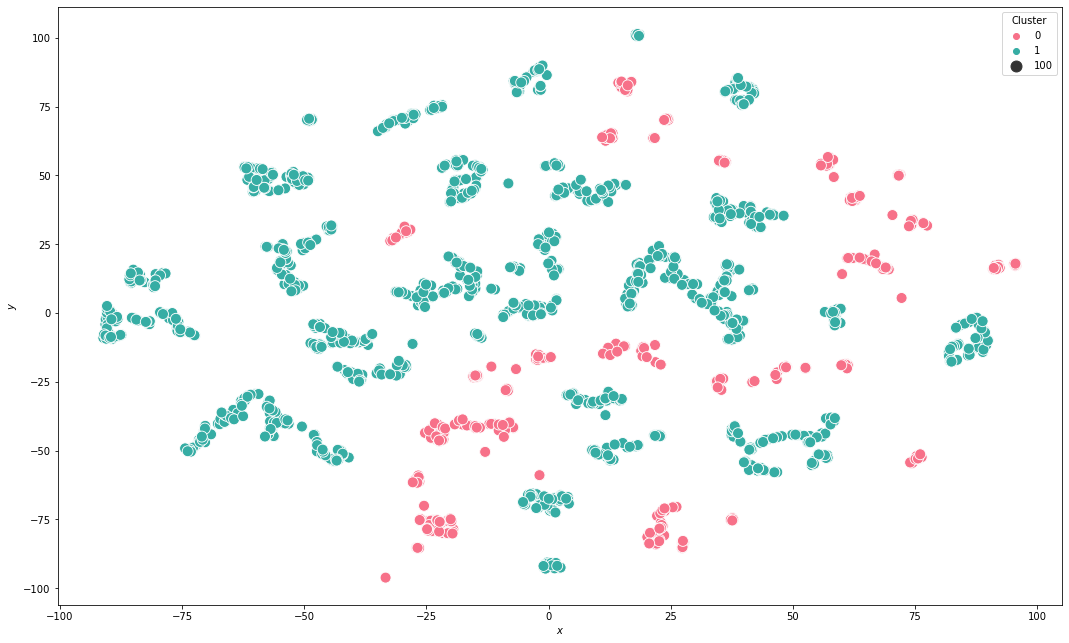

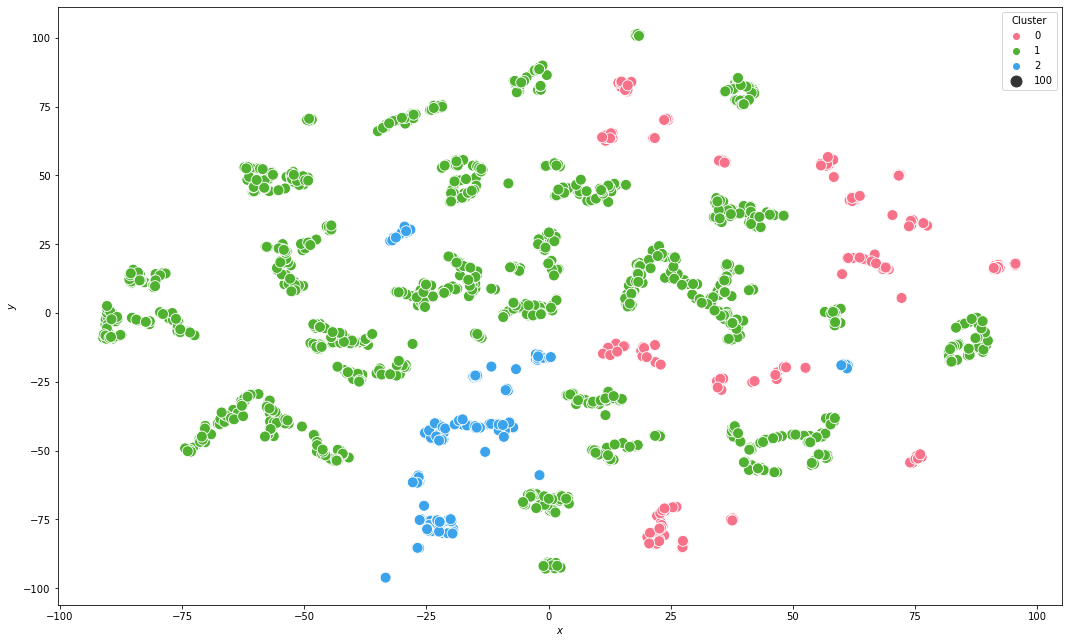

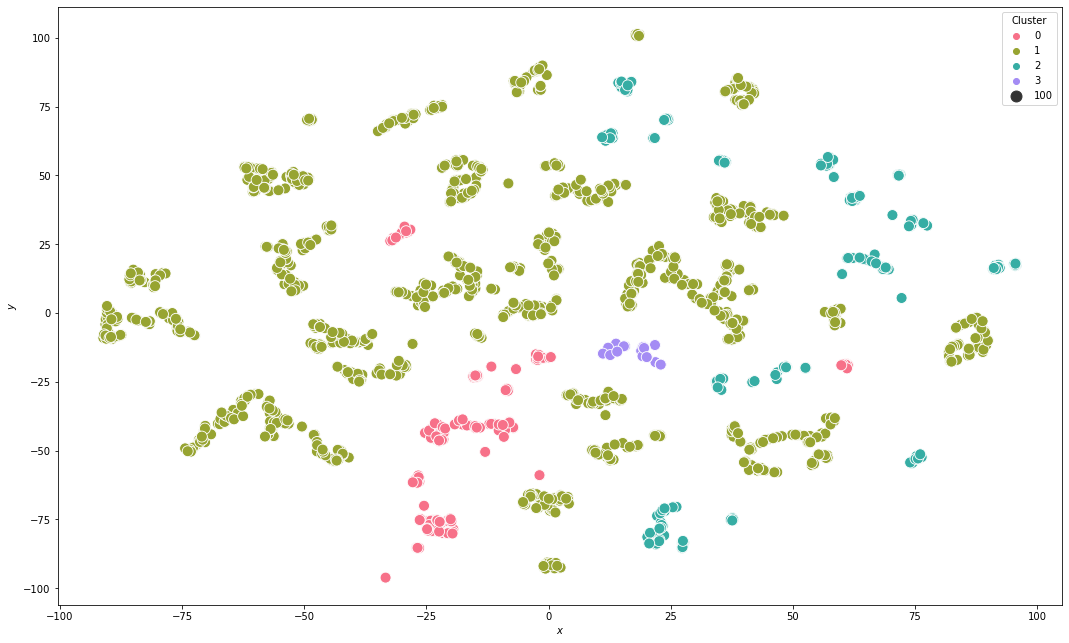

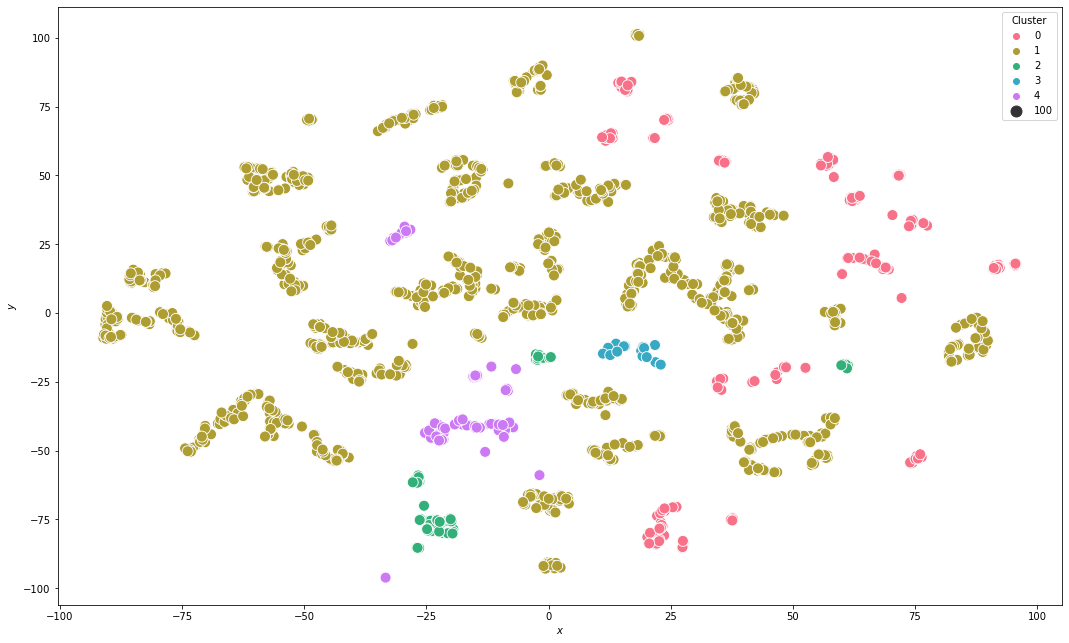

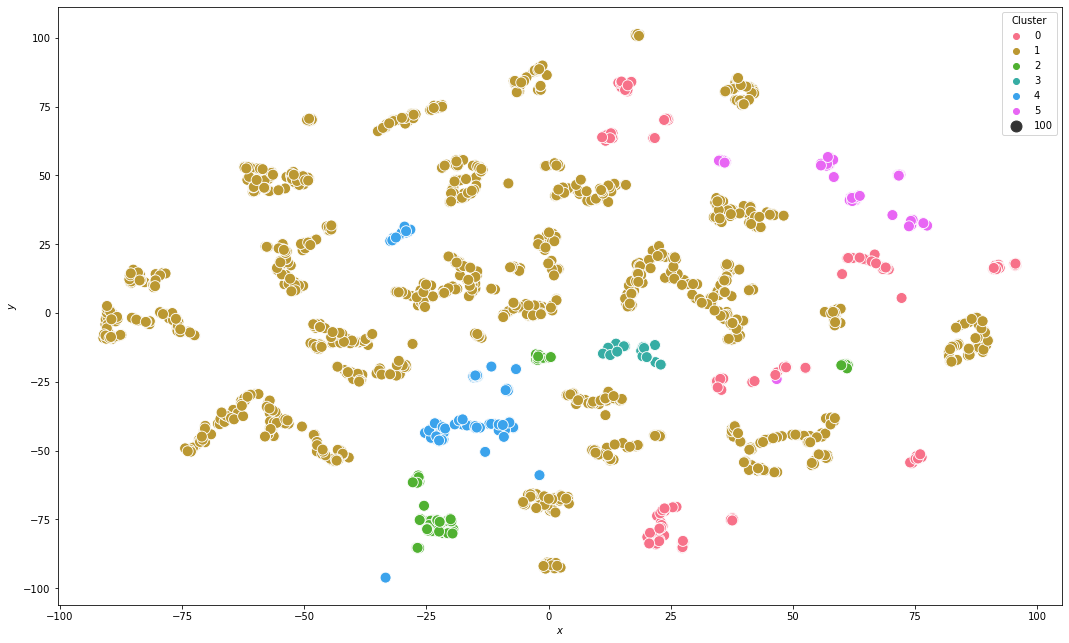

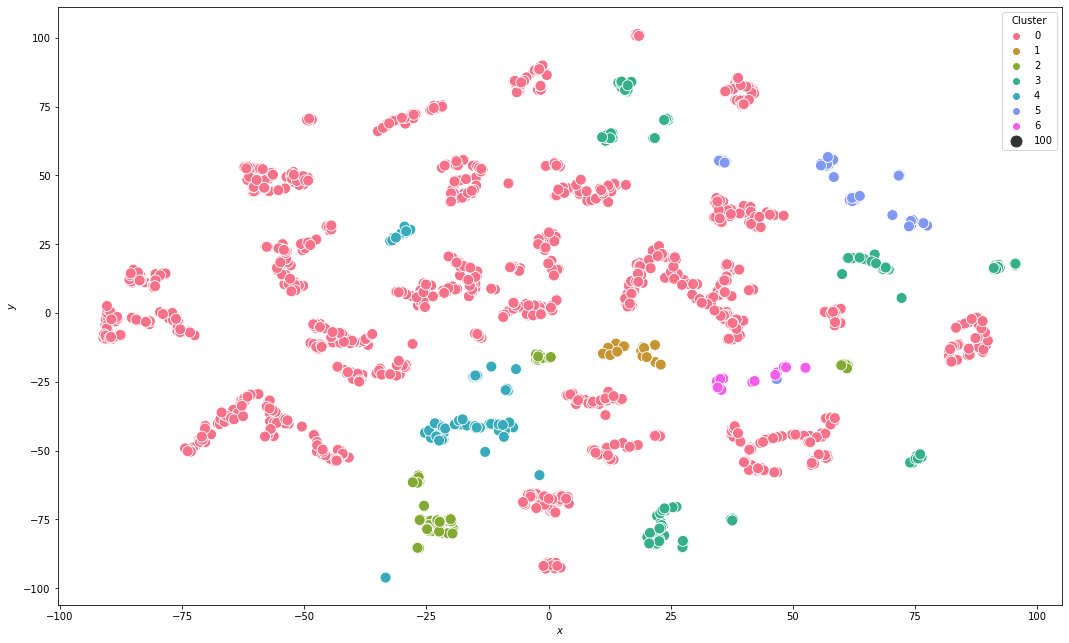

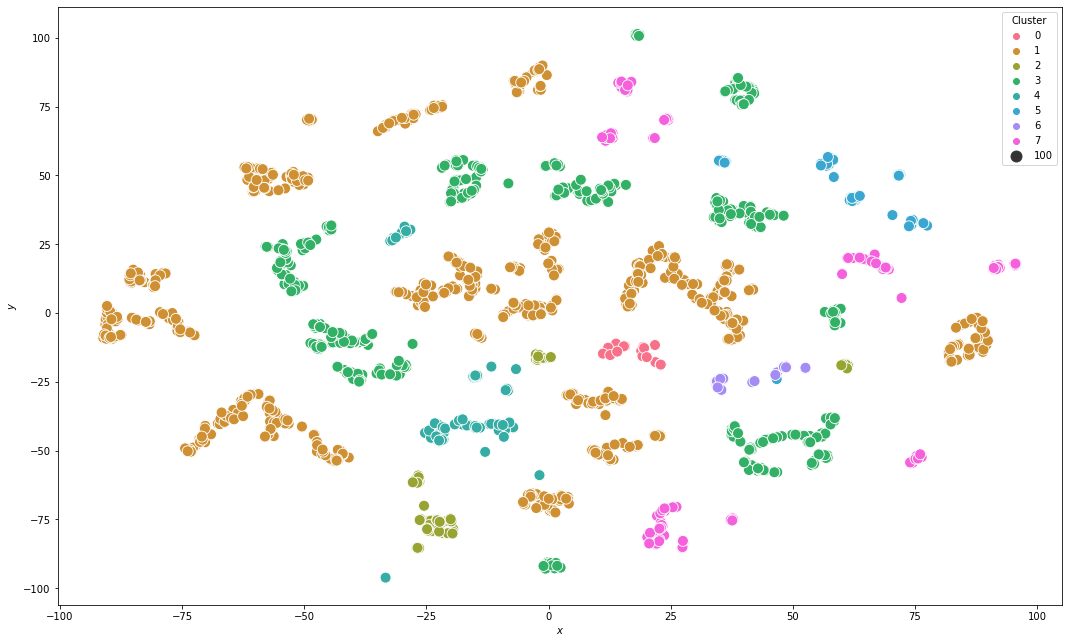

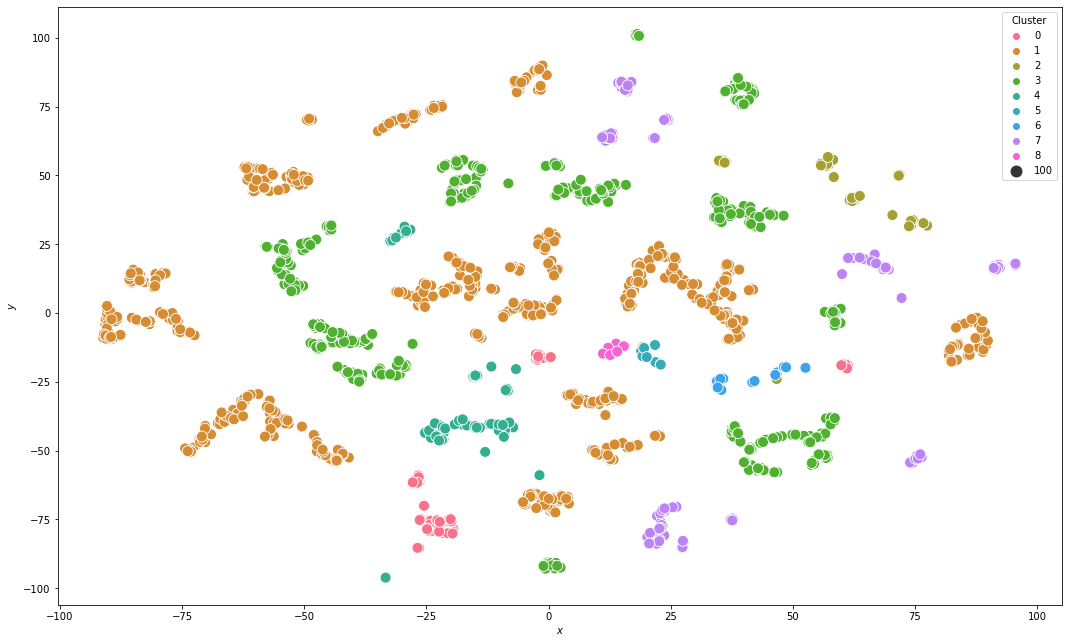

In [80]:
for n in range(2,10 ):
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
    Y_pred = ag.fit_predict(df_mms)

    df_pred = pd.Series(Y_pred, name='Cluster', index=df.index)
    pdff = pd.concat([dff, df_pred], axis=1)

    fig, ax = plt.subplots(figsize=(18, 11))
    sns.scatterplot(x='x',
                    y='y',
                    hue='Cluster',
                    size=100,
                    
                    sizes=(120, 120),
                    palette=sns.color_palette("husl", n),
                    data=pdff,
                    ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()
        

In [81]:
pdff

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,x,y,Cluster
0,100000001,0,0,67,2,124670,1,2,55.926174,54.198200,2
1,100000002,1,1,22,1,150773,1,2,-57.430622,44.516571,1
2,100000003,0,0,49,1,89210,0,0,42.770481,-57.295624,3
3,100000004,0,0,45,1,171565,1,1,-88.608940,-3.040108,1
4,100000005,0,0,53,1,149031,1,1,-89.351913,-9.449634,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-44.461697,31.816893,3
1996,100001997,1,1,27,1,117744,1,0,29.579767,10.532527,1
1997,100001998,0,0,31,0,86400,0,0,2.008067,44.866917,3
1998,100001999,1,1,24,1,97968,0,0,-25.075827,10.349294,1


In [82]:
pdff['Cluster'].value_counts(1,dropna=False)

1    0.4660
3    0.2775
7    0.0860
4    0.0580
0    0.0410
2    0.0345
6    0.0190
5    0.0110
8    0.0070
Name: Cluster, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Income'>

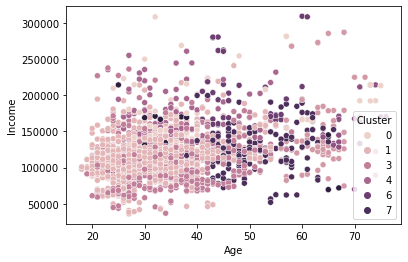

In [83]:
sns.scatterplot(data=pdff, x="Age", y="Income",hue="Cluster")

## Kmeans

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

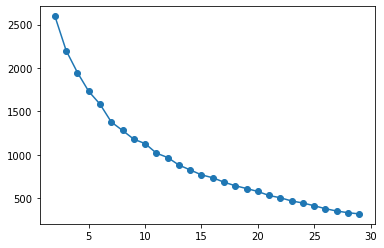

In [72]:
l = []
for k in range(2,30):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(df_mms)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'],marker='o')

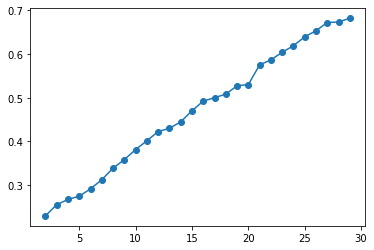

In [73]:
l = []
for k in range(2,30):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(df_mms)
    l.append((k,silhouette_score(df_mms,km.predict(df_mms))))
inercia = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(inercia['k'],inercia['silueta'],marker='o')

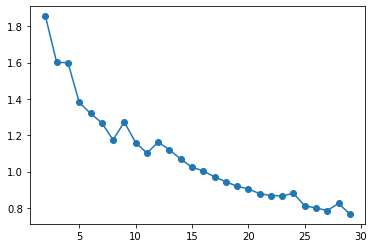

In [76]:
l = []
for k in range(2,30):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(df_mms)
    l.append((k,davies_bouldin_score(df_mms,km.predict(df_mms))))
inercia = pd.DataFrame(l,columns=['k','davies_bouldin_score'])

plt.plot(inercia['k'],inercia['davies_bouldin_score'],marker='o')

In [31]:
k = 30
km = KMeans(n_clusters=k,max_iter=100)

In [33]:
km.fit(df_mms)

KMeans(max_iter=100, n_clusters=30)

C:\Users\Yimel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


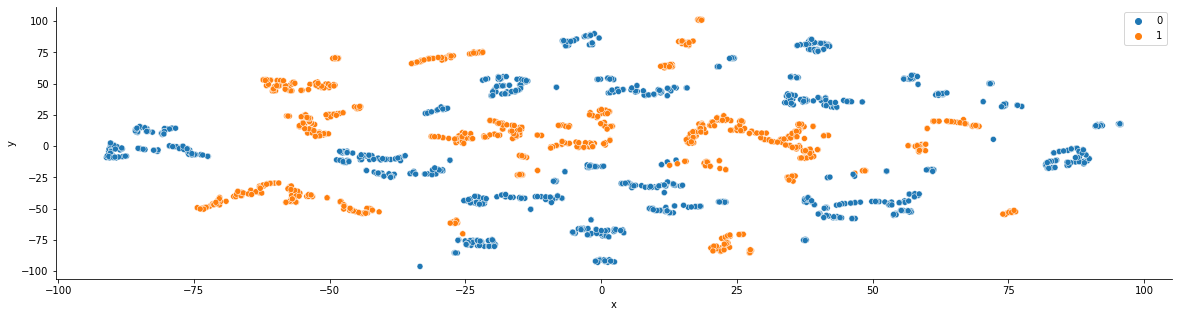

In [85]:
current_palette = sns.color_palette()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(df_mms) #Asigna datos al grupo que le corresponda
plt.subplots(figsize=(20,5))
sns.scatterplot(pdff["x"], pdff["y"],hue=pred_y,palette=current_palette[:2])
sns.despine()
plt.show()

In [99]:
df_r=df_r.merge(pdff['Cluster'],how='left',right_index=True,left_index=True)
df_r["K-Means-2"]=pred_y
df_r

,Sex,Marital status,Age,Income,Occupation_1,Occupation_2,Education_1,Education_2,Education_3,Settlement size_1,Settlement size_2,Cluster_x,Cluster_y,K-Medioides-2,Cluster,K-Means-2
0,0,0,67,124670,1,0,0,1,0,0,1,2,2,1,2,0
1,1,1,22,150773,1,0,1,0,0,0,1,1,1,0,1,1
2,0,0,49,89210,0,0,1,0,0,0,0,3,3,1,3,0
3,0,0,45,171565,1,0,1,0,0,1,0,1,1,1,1,0
4,0,0,53,149031,1,0,1,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,123525,0,0,1,0,0,0,0,3,3,1,3,1
1996,1,1,27,117744,1,0,1,0,0,0,0,1,1,0,1,1
1997,0,0,31,86400,0,0,0,0,0,0,0,3,3,1,3,0
1998,1,1,24,97968,0,0,1,0,0,0,0,1,1,0,1,1


In [90]:
from sklearn_extra.cluster import KMedoids #Instalar scikit-learn-extra
medoids=KMedoids(n_clusters=2, metric='euclidean',method='pam')

In [91]:
medoids.fit_predict(df_mms)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [92]:
pdff["K-Medioides-2"]=df_r["K-Medioides-2"]=medoids.fit_predict(df_mms)

In [93]:
pdff

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,x,y,Cluster,K-Medioides-2
0,100000001,0,0,67,2,124670,1,2,55.926174,54.198200,2,1
1,100000002,1,1,22,1,150773,1,2,-57.430622,44.516571,1,0
2,100000003,0,0,49,1,89210,0,0,42.770481,-57.295624,3,1
3,100000004,0,0,45,1,171565,1,1,-88.608940,-3.040108,1,1
4,100000005,0,0,53,1,149031,1,1,-89.351913,-9.449634,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-44.461697,31.816893,3,1
1996,100001997,1,1,27,1,117744,1,0,29.579767,10.532527,1,0
1997,100001998,0,0,31,0,86400,0,0,2.008067,44.866917,3,1
1998,100001999,1,1,24,1,97968,0,0,-25.075827,10.349294,1,0


C:\Users\Yimel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


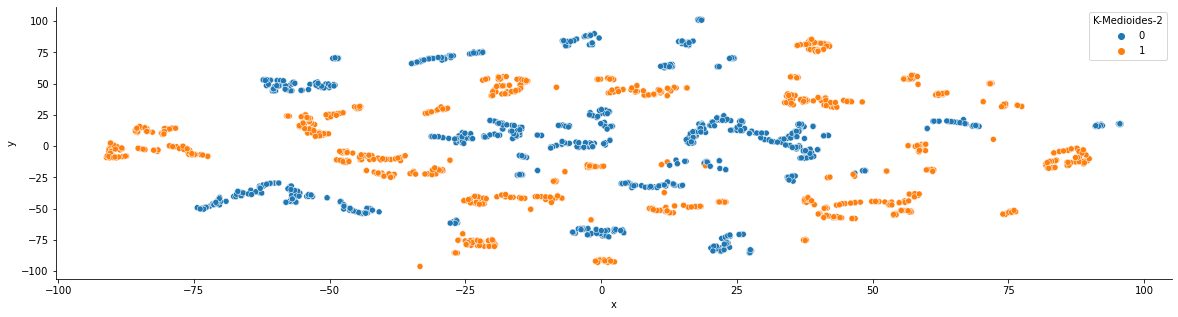

In [96]:
plt.subplots(figsize=(20,5))
sns.scatterplot(pdff["x"], pdff["y"],hue=pdff["K-Medioides-2"],palette=current_palette[:2])
sns.despine()
plt.show()

In [97]:
df_r["K-Medioides-2"].value_counts(1,dropna=False)

1    0.524
0    0.476
Name: K-Medioides-2, dtype: float64

In [105]:
df_r

,Sex,Marital status,Age,Income,Occupation_1,Occupation_2,Education_1,Education_2,Education_3,Settlement size_1,Settlement size_2,Cluster_x,Cluster_y,K-Medioides-2,Cluster,K-Means-2
0,0,0,67,124670,1,0,0,1,0,0,1,2,2,1,2,0
1,1,1,22,150773,1,0,1,0,0,0,1,1,1,0,1,1
2,0,0,49,89210,0,0,1,0,0,0,0,3,3,1,3,0
3,0,0,45,171565,1,0,1,0,0,1,0,1,1,1,1,0
4,0,0,53,149031,1,0,1,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,123525,0,0,1,0,0,0,0,3,3,1,3,1
1996,1,1,27,117744,1,0,1,0,0,0,0,1,1,0,1,1
1997,0,0,31,86400,0,0,0,0,0,0,0,3,3,1,3,0
1998,1,1,24,97968,0,0,1,0,0,0,0,1,1,0,1,1


In [101]:
#Perfilamiento
df_r.groupby(by="Cluster").mean().style.background_gradient(cmap='Blues')

,Sex,Marital status,Age,Income,Occupation_1,Occupation_2,Education_1,Education_2,Education_3,Settlement size_1,Settlement size_2,Cluster_x,Cluster_y,K-Medioides-2,K-Means-2
Cluster,,,,,,,,,,,,,,,
0,0.182927,0.341463,39.000000,168694.268293,0.000000,1.000000,0.780488,0.146341,0.000000,1.000000,0.000000,0.000000,0.000000,0.841463,0.182927
1,0.639485,0.759657,30.891631,111686.143777,0.752146,0.000000,1.000000,0.000000,0.000000,0.314378,0.112661,1.000000,1.000000,0.232833,0.639485
2,0.000000,0.000000,63.753623,150431.318841,0.579710,0.173913,0.000000,1.000000,0.000000,0.275362,0.420290,2.000000,2.000000,1.000000,0.000000
3,0.192793,0.000000,33.843243,107874.495495,0.473874,0.000000,0.531532,0.000000,0.000000,0.140541,0.295495,3.000000,3.000000,0.983784,0.192793
4,0.103448,0.250000,35.189655,163940.267241,0.000000,0.956897,0.818966,0.000000,0.000000,0.000000,0.905172,4.000000,4.000000,0.896552,0.103448
5,1.000000,0.909091,68.454545,148912.681818,0.500000,0.272727,0.000000,0.000000,1.000000,0.363636,0.000000,5.000000,5.000000,0.045455,1.000000
6,0.657895,1.000000,48.973684,204701.026316,0.000000,1.000000,0.000000,1.000000,0.000000,0.342105,0.605263,6.000000,6.000000,0.342105,0.657895
7,0.755814,0.906977,50.302326,125890.383721,0.540698,0.000000,0.000000,1.000000,0.000000,0.296512,0.156977,7.000000,7.000000,0.139535,0.755814
8,0.500000,1.000000,39.000000,143527.214286,0.357143,0.357143,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000,8.000000,0.357143,0.500000


In [103]:
df_r.loc[df_r["Cluster"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age,Income
count,82.00000,82.000000
mean,39.00000,168694.268293
std,12.74537,43707.210406
min,21.00000,91019.000000
10%,27.10000,126720.100000
25%,31.00000,143904.250000
50%,36.00000,157362.500000
75%,40.00000,180828.750000
90%,57.00000,222280.100000
max,75.00000,308491.000000


[Text(0.5, 1.0, 'Ingreso Cluster 8')]

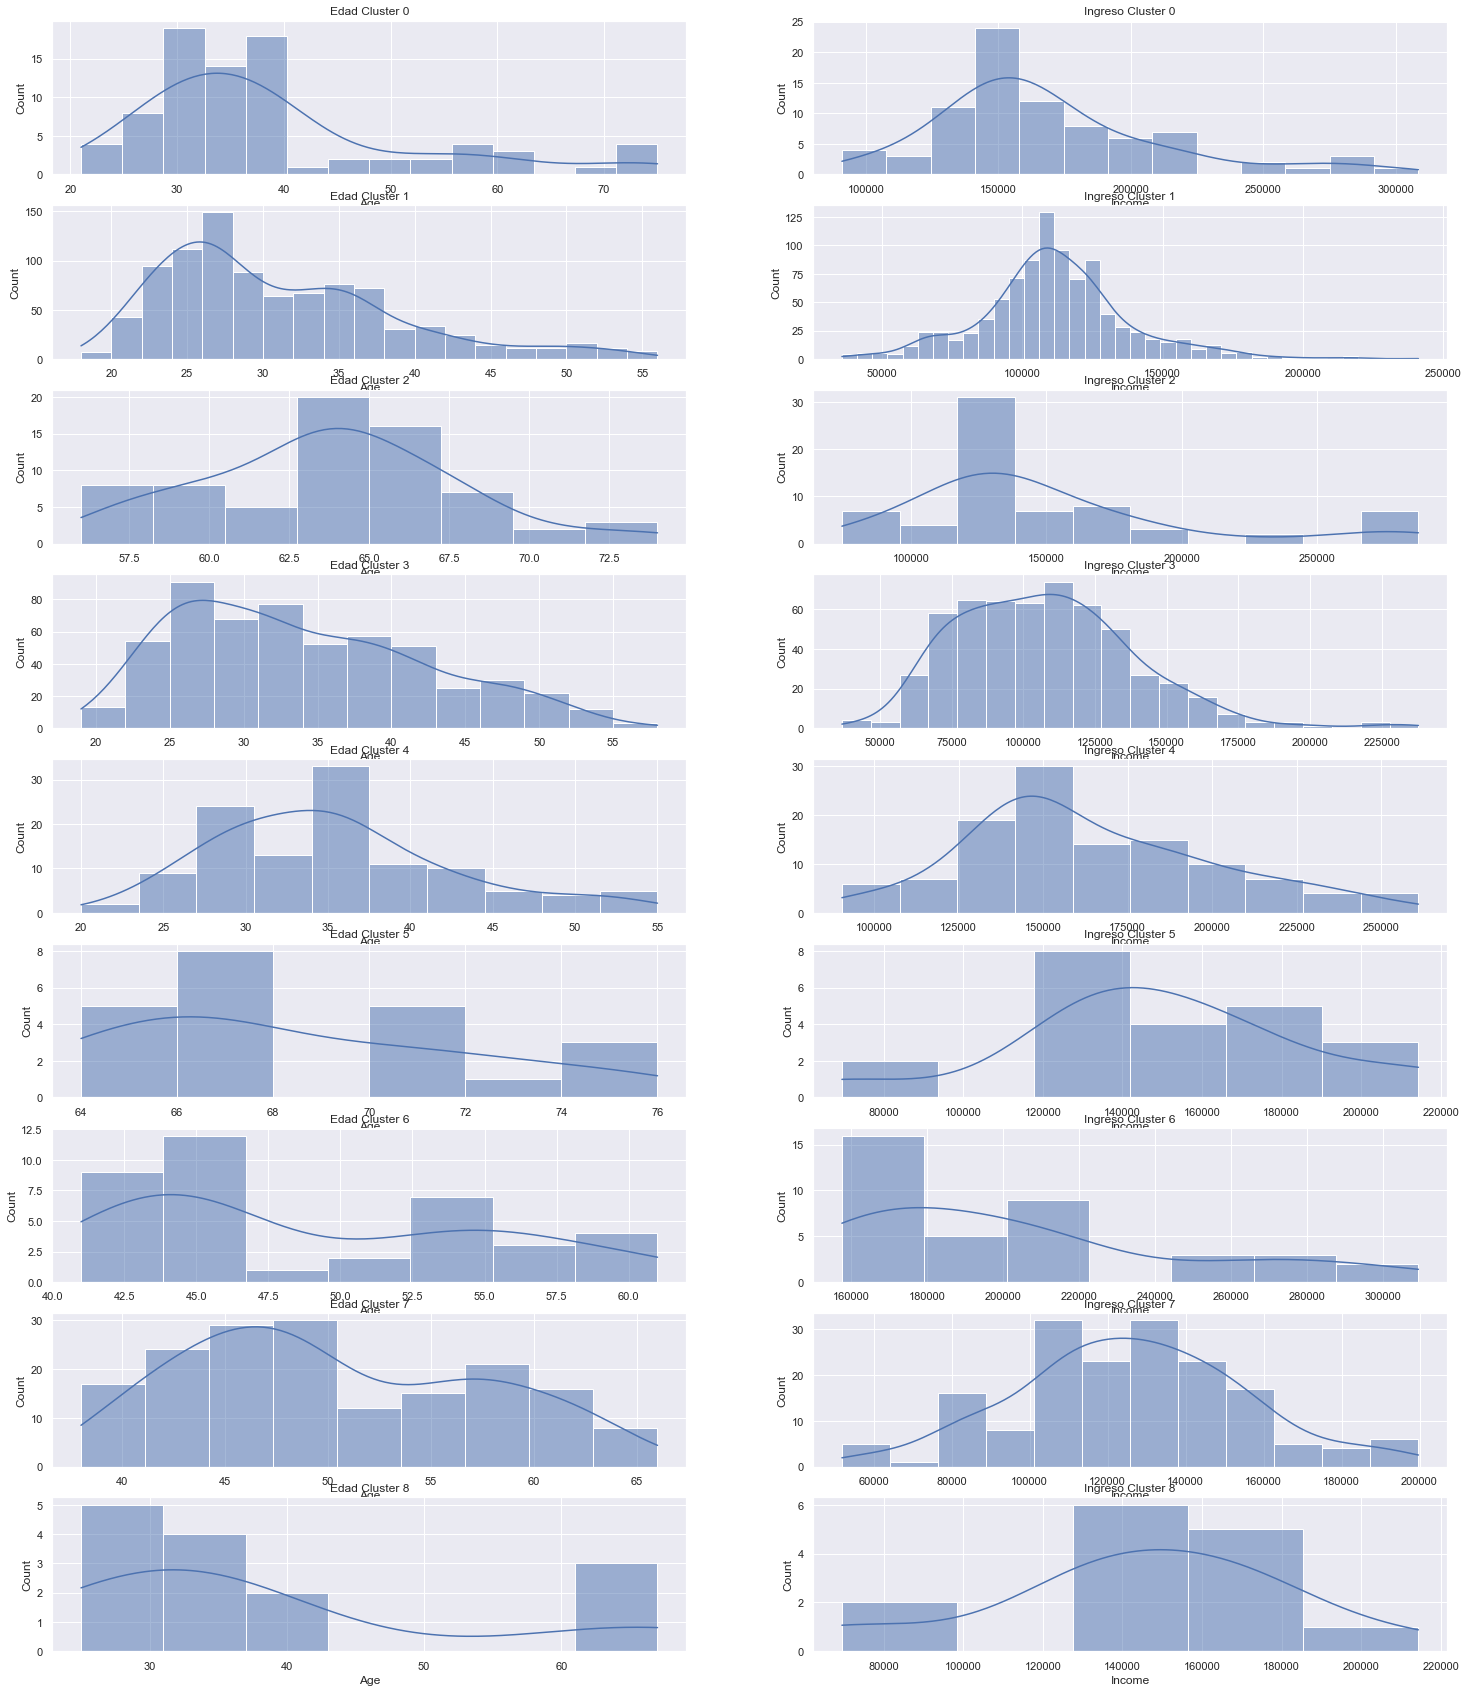

In [117]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(9, 2,figsize=(25, 30))

#create boxplot in each subplot
sns.histplot(data=df_r.loc[df_r["Cluster"]==0], x="Age", kde=True,ax=axes[0,0]).set(title="Edad Cluster 0")
sns.histplot(data=df_r.loc[df_r["Cluster"]==0], x="Income", kde=True,ax=axes[0,1]).set(title="Ingreso Cluster 0")
sns.histplot(data=df_r.loc[df_r["Cluster"]==1], x="Age", kde=True,ax=axes[1,0]).set(title="Edad Cluster 1")
sns.histplot(data=df_r.loc[df_r["Cluster"]==1], x="Income", kde=True,ax=axes[1,1]).set(title="Ingreso Cluster 1")
sns.histplot(data=df_r.loc[df_r["Cluster"]==2], x="Age", kde=True,ax=axes[2,0]).set(title="Edad Cluster 2")
sns.histplot(data=df_r.loc[df_r["Cluster"]==2], x="Income", kde=True,ax=axes[2,1]).set(title="Ingreso Cluster 2")
sns.histplot(data=df_r.loc[df_r["Cluster"]==3], x="Age", kde=True,ax=axes[3,0]).set(title="Edad Cluster 3")
sns.histplot(data=df_r.loc[df_r["Cluster"]==3], x="Income", kde=True,ax=axes[3,1]).set(title="Ingreso Cluster 3")
sns.histplot(data=df_r.loc[df_r["Cluster"]==4], x="Age", kde=True,ax=axes[4,0]).set(title="Edad Cluster 4")
sns.histplot(data=df_r.loc[df_r["Cluster"]==4], x="Income", kde=True,ax=axes[4,1]).set(title="Ingreso Cluster 4")
sns.histplot(data=df_r.loc[df_r["Cluster"]==5], x="Age", kde=True,ax=axes[5,0]).set(title="Edad Cluster 5")
sns.histplot(data=df_r.loc[df_r["Cluster"]==5], x="Income", kde=True,ax=axes[5,1]).set(title="Ingreso Cluster 5")
sns.histplot(data=df_r.loc[df_r["Cluster"]==6], x="Age", kde=True,ax=axes[6,0]).set(title="Edad Cluster 6")
sns.histplot(data=df_r.loc[df_r["Cluster"]==6], x="Income", kde=True,ax=axes[6,1]).set(title="Ingreso Cluster 6")
sns.histplot(data=df_r.loc[df_r["Cluster"]==7], x="Age", kde=True,ax=axes[7,0]).set(title="Edad Cluster 7")
sns.histplot(data=df_r.loc[df_r["Cluster"]==7], x="Income", kde=True,ax=axes[7,1]).set(title="Ingreso Cluster 7")
sns.histplot(data=df_r.loc[df_r["Cluster"]==8], x="Age", kde=True,ax=axes[8,0]).set(title="Edad Cluster 8")
sns.histplot(data=df_r.loc[df_r["Cluster"]==8], x="Income", kde=True,ax=axes[8,1]).set(title="Ingreso Cluster 8")

In [113]:
c0 = pd.DataFrame(df_r.loc[df_r["Cluster"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c0.rename(columns={"Age":"Edad_0","Income":"Ingreso_0"},inplace=True)
c1 = pd.DataFrame(df_r.loc[df_r["Cluster"]==1,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c1.rename(columns={"Age":"Edad_1","Income":"Ingreso_1"},inplace=True)
c2 = pd.DataFrame(df_r.loc[df_r["Cluster"]==2,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c2.rename(columns={"Age":"Edad_2","Income":"Ingreso_2"},inplace=True)
c3 = pd.DataFrame(df_r.loc[df_r["Cluster"]==3,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c3.rename(columns={"Age":"Edad_3","Income":"Ingreso_3"},inplace=True)
c4 = pd.DataFrame(df_r.loc[df_r["Cluster"]==4,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c4.rename(columns={"Age":"Edad_4","Income":"Ingreso_4"},inplace=True)
c5 = pd.DataFrame(df_r.loc[df_r["Cluster"]==5,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c5.rename(columns={"Age":"Edad_5","Income":"Ingreso_5"},inplace=True)
c6 = pd.DataFrame(df_r.loc[df_r["Cluster"]==6,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c6.rename(columns={"Age":"Edad_6","Income":"Ingreso_6"},inplace=True)
c7 = pd.DataFrame(df_r.loc[df_r["Cluster"]==7,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c7.rename(columns={"Age":"Edad_7","Income":"Ingreso_7"},inplace=True)
c8 = pd.DataFrame(df_r.loc[df_r["Cluster"]==8,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c8.rename(columns={"Age":"Edad_8","Income":"Ingreso_8"},inplace=True)
cdf_r= pd.concat([c0,c1,c2,c3,c4,c5,c6,c7,c8],axis=1)
edad=cdf_r[["Edad_0","Edad_1","Edad_2","Edad_3","Edad_4","Edad_5","Edad_6","Edad_7","Edad_8"]]
edad.style.background_gradient(cmap='Blues',axis=1)

,Edad_0,Edad_1,Edad_2,Edad_3,Edad_4,Edad_5,Edad_6,Edad_7,Edad_8
count,82.000000,932.000000,69.000000,555.000000,116.000000,22.000000,38.000000,172.000000,14.000000
mean,39.000000,30.891631,63.753623,33.843243,35.189655,68.454545,48.973684,50.302326,39.000000
std,12.745370,7.778489,3.986764,8.365021,7.235076,3.725425,6.322362,7.190100,14.832397
min,21.000000,18.000000,56.000000,19.000000,20.000000,64.000000,41.000000,38.000000,25.000000
10%,27.100000,23.000000,58.000000,24.000000,27.000000,64.000000,42.700000,42.000000,28.600000
25%,31.000000,25.000000,61.000000,27.000000,30.000000,66.000000,44.000000,45.000000,30.000000
50%,36.000000,29.000000,64.000000,32.000000,34.500000,67.000000,46.000000,49.000000,32.500000
75%,40.000000,35.000000,66.000000,40.000000,39.000000,71.000000,54.750000,57.000000,37.750000
90%,57.000000,42.000000,68.000000,46.600000,45.000000,73.900000,57.900000,61.000000,65.000000
max,75.000000,56.000000,74.000000,58.000000,55.000000,76.000000,61.000000,66.000000,67.000000


In [114]:
ingreso=cdf_r[["Ingreso_0","Ingreso_1","Ingreso_2","Ingreso_3","Ingreso_4","Ingreso_5","Ingreso_6","Ingreso_7","Ingreso_8"]]
ingreso.style.background_gradient(cmap='Blues',axis=1)

,Ingreso_0,Ingreso_1,Ingreso_2,Ingreso_3,Ingreso_4,Ingreso_5,Ingreso_6,Ingreso_7,Ingreso_8
count,82.000000,932.000000,69.000000,555.000000,116.000000,22.000000,38.000000,172.000000,14.000000
mean,168694.268293,111686.143777,150431.318841,107874.495495,163940.267241,148912.681818,204701.026316,125890.383721,143527.214286
std,43707.210406,26638.248305,52478.451423,31273.742650,36946.054784,37634.435479,44661.651470,29349.743584,38813.172530
min,91019.000000,35832.000000,74525.000000,36760.000000,90500.000000,69487.000000,157595.000000,51882.000000,69487.000000
10%,126720.100000,78952.300000,95057.800000,69577.800000,122637.000000,128082.000000,160419.000000,86164.100000,89320.500000
25%,143904.250000,97701.500000,122267.000000,84543.000000,140627.000000,131742.750000,168933.000000,108281.000000,131740.250000
50%,157362.500000,110120.000000,135705.000000,106015.000000,153404.500000,143561.500000,194174.000000,126018.500000,139775.500000
75%,180828.750000,124487.750000,166988.000000,126297.500000,184371.250000,169467.750000,217785.500000,145430.000000,169243.500000
90%,222280.100000,144575.700000,233572.800000,147967.600000,220946.000000,207520.000000,279884.900000,161186.200000,170770.300000
max,308491.000000,241068.000000,287247.000000,237799.000000,260977.000000,214364.000000,309364.000000,199711.000000,214364.000000


In [115]:
#k-medioides
df_r.groupby(by="K-Medioides-2").mean().style.background_gradient(cmap='Blues')

,Sex,Marital status,Age,Income,Occupation_1,Occupation_2,Education_1,Education_2,Education_3,Settlement size_1,Settlement size_2,Cluster_x,Cluster_y,Cluster,K-Means-2
K-Medioides-2,,,,,,,,,,,,,,,
0,0.838235,0.934874,33.307773,117631.039916,0.678571,0.060924,0.777311,0.181723,0.031513,0.273109,0.175420,2.261555,2.261555,2.261555,0.838235
1,0.110687,0.098282,38.271947,123973.366412,0.445611,0.187023,0.616412,0.112595,0.005725,0.270992,0.286260,2.576336,2.576336,2.576336,0.110687


[Text(0.5, 1.0, 'Ingreso Cluster 1')]

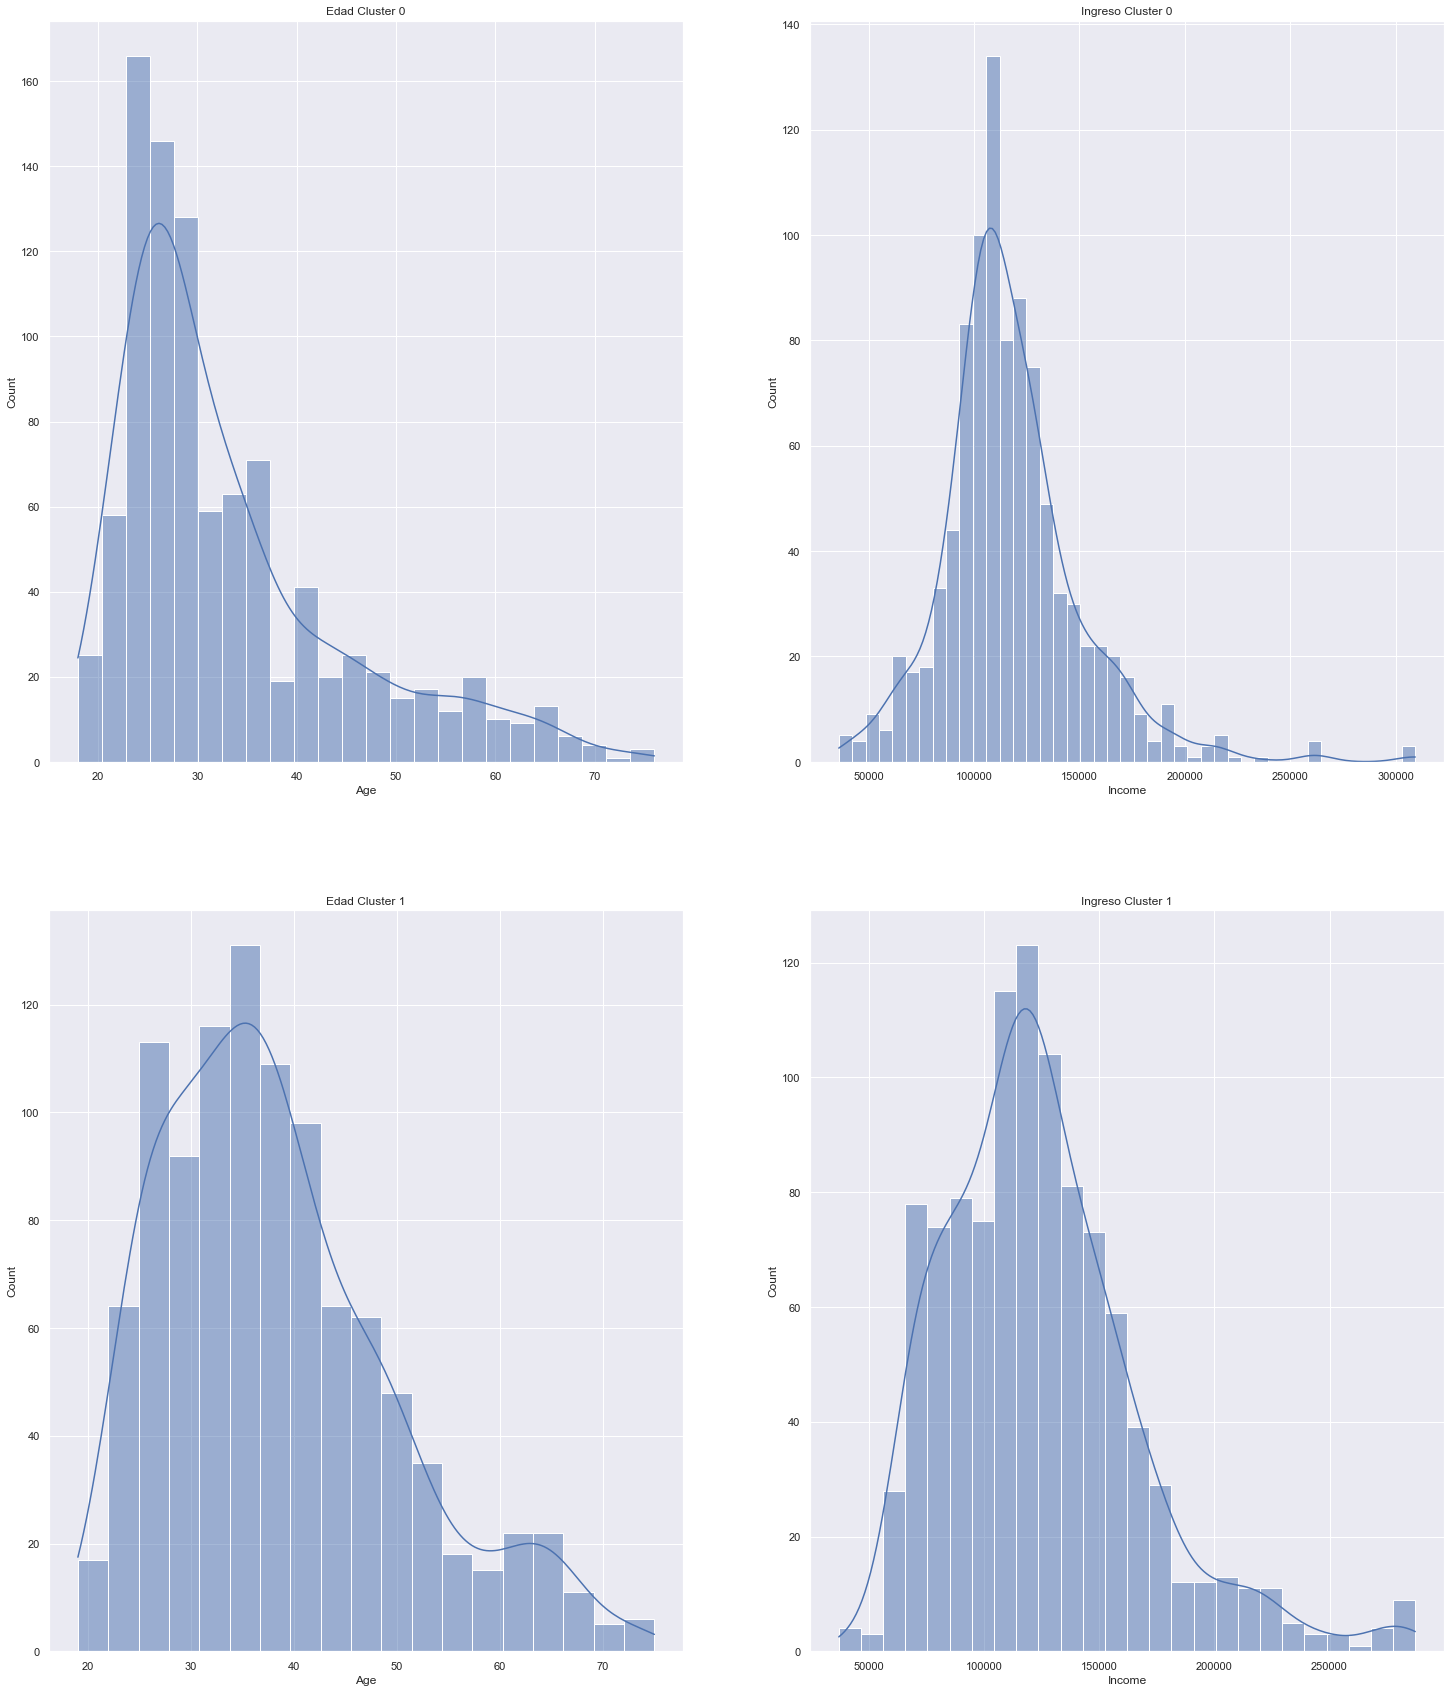

In [120]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2,figsize=(25, 30))

#create boxplot in each subplot
sns.histplot(data=df_r.loc[df_r["K-Medioides-2"]==0], x="Age", kde=True,ax=axes[0,0]).set(title="Edad Cluster 0")
sns.histplot(data=df_r.loc[df_r["K-Medioides-2"]==0], x="Income", kde=True,ax=axes[0,1]).set(title="Ingreso Cluster 0")
sns.histplot(data=df_r.loc[df_r["K-Medioides-2"]==1], x="Age", kde=True,ax=axes[1,0]).set(title="Edad Cluster 1")
sns.histplot(data=df_r.loc[df_r["K-Medioides-2"]==1], x="Income", kde=True,ax=axes[1,1]).set(title="Ingreso Cluster 1")

In [121]:
c0 = pd.DataFrame(df_r.loc[df_r["K-Medioides-2"]==0,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c0.rename(columns={"Age":"Edad_0","Income":"Ingreso_0"},inplace=True)
c1 = pd.DataFrame(df_r.loc[df_r["K-Medioides-2"]==1,["Age","Income"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))
c1.rename(columns={"Age":"Edad_1","Income":"Ingreso_1"},inplace=True)

In [122]:
cmedioides= pd.concat([c0,c1],axis=1)
edad_med=cmedioides[["Edad_0","Edad_1"]]
edad_med.style.background_gradient(cmap='Blues',axis=1)

,Edad_0,Edad_1
count,952.000000,1048.000000
mean,33.307773,38.271947
std,11.548044,11.373468
min,18.000000,19.000000
10%,23.000000,25.000000
25%,25.000000,30.000000
50%,29.000000,36.000000
75%,37.000000,45.000000
90%,51.000000,54.000000
max,76.000000,75.000000


In [123]:
ingreso_med=cmedioides[["Ingreso_0","Ingreso_1"]]
ingreso_med.style.background_gradient(cmap='Blues',axis=1)

,Ingreso_0,Ingreso_1
count,952.000000,1048.000000
mean,117631.039916,123973.366412
std,33105.714667,41930.055304
min,35832.000000,36760.000000
10%,84421.800000,73612.400000
25%,99347.250000,94147.750000
50%,112486.500000,118763.000000
75%,131188.000000,144939.750000
90%,158656.800000,175266.200000
max,309364.000000,287247.000000
